# Import Libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import linear_model 
from sklearn.ensemble import IsolationForest

# Load Data

In [2]:
df = pd.read_csv("Chennai House Price.csv")
df.head()

,AREA,DATE_SALE,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALES_PRICE,PARK_FACIL,DATE_BUILD,REG_FEE,COMMIS,SALE_COND
0,Anna Nagar,19-12-2006,1986,2,1,5,21717770,No,22-12-1995,760122,304049,Ab Normal
1,Velachery,13-03-2010,1855,3,2,5,9630290,No,18-03-1988,356321,77042,Family
2,Chrompet,11-09-2014,1220,2,1,4,12394750,No,12-09-2009,409027,198316,Partial
3,Chrompet,05-04-2007,1167,1,1,3,8488790,No,12-04-1979,263152,33955,Partial
4,Velachery,13-03-2006,1847,3,2,5,16800250,No,15-03-1996,604809,235204,Family


In [3]:
df.describe()

,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALES_PRICE,REG_FEE,COMMIS
count,7103.000000,7103.000000,7103.00000,7103.000000,7.103000e+03,7103.000000,7103.000000
mean,1382.117556,1.637336,1.21329,3.688723,1.089477e+07,376952.707588,141055.364212
std,457.484517,0.803030,0.40966,1.019299,3.769549e+06,143088.109006,78775.875689
min,500.000000,1.000000,1.00000,2.000000,2.156875e+06,71177.000000,5055.000000
25%,993.000000,1.000000,1.00000,3.000000,8.270900e+06,272469.000000,84252.500000
50%,1373.000000,1.000000,1.00000,4.000000,1.033464e+07,349509.000000,127644.000000
75%,1744.000000,2.000000,1.00000,4.000000,1.299422e+07,451544.500000,184534.000000
max,2500.000000,4.000000,2.00000,6.000000,2.366734e+07,983922.000000,495405.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7103 entries, 0 to 7102
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   AREA         7103 non-null   object
 1   DATE_SALE    7103 non-null   object
 2   INT_SQFT     7103 non-null   int64 
 3   N_BEDROOM    7103 non-null   int64 
 4   N_BATHROOM   7103 non-null   int64 
 5   N_ROOM       7103 non-null   int64 
 6   SALES_PRICE  7103 non-null   int64 
 7   PARK_FACIL   7103 non-null   object
 8   DATE_BUILD   7103 non-null   object
 9   REG_FEE      7103 non-null   int64 
 10  COMMIS       7103 non-null   int64 
 11  SALE_COND    7103 non-null   object
dtypes: int64(7), object(5)
memory usage: 666.0+ KB


# Exploratory Data Analysis (EDA)


In [5]:
# Identify the outliers

# Select features to detect outliers (e.g., 'INT_SQFT', 'SALES_PRICE')
features = df[['INT_SQFT', 'SALES_PRICE']]

In [6]:
# Fit the Isolation Forest model
iso_forest = IsolationForest(contamination=0.05)
df['anomaly'] = iso_forest.fit_predict(features)


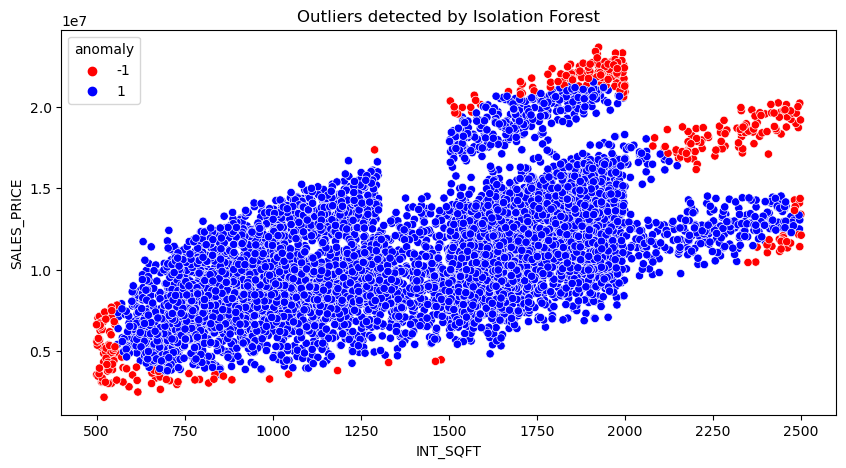

In [7]:
# Visualize outliers on a scatter plot
plt.figure(figsize=(10, 5))
sns.scatterplot(x='INT_SQFT', y='SALES_PRICE', hue='anomaly', data=df, palette=['red', 'blue'])
plt.title("Outliers detected by Isolation Forest")
plt.show()

# Select features and target


In [8]:
X = df[['INT_SQFT','N_BEDROOM','N_BATHROOM','N_ROOM','REG_FEE','COMMIS']]
y = df['SALES_PRICE']



# Split the data into training and test sets

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40) 


# Train our Linear Regression Model

In [10]:
lr = linear_model.LinearRegression()

lr.fit(X_train,y_train)


LinearRegression()

# Make Predictions

In [11]:
price = lr.predict(X_test)


In [12]:
print(price)

[ 9553593.96808223  9969461.46510119  8409142.33320023 ...
  9628180.70617905 17692178.63580619  7309540.24673806]


In [13]:
y_test

6069    10160800
4647     9879360
2830     7561350
4266    16410600
4627    11235250
          ...   
3702     5335750
3177     8578170
322      6602375
2010    16497820
2556     4864750
Name: SALES_PRICE, Length: 1421, dtype: int64

In [14]:
coeff_df = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
INT_SQFT,-1.276246e+03
N_BEDROOM,-1.435681e+06
N_BATHROOM,-1.053650e+06
N_ROOM,2.042664e+06
REG_FEE,1.940283e+01
COMMIS,4.483613e+00


# Plot Actual vs Predicted values

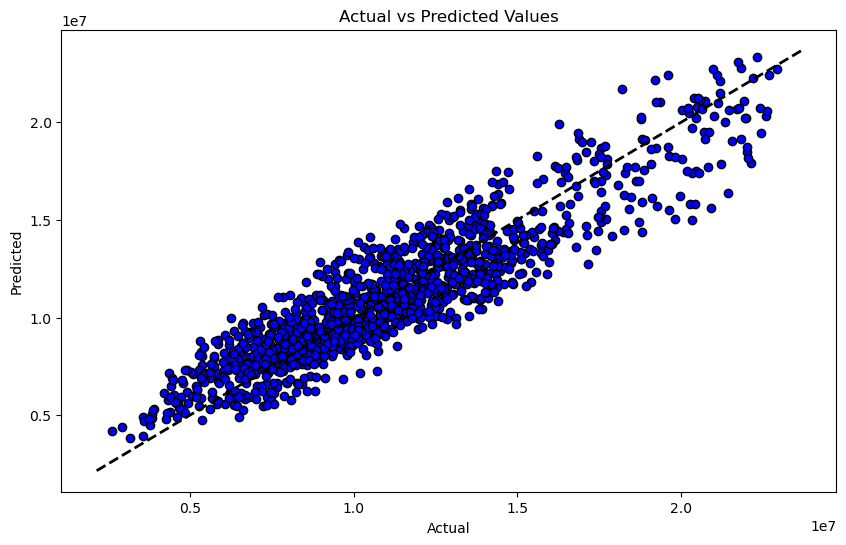

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, price, color='blue', edgecolors='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

# Evaluate Model's Performance

In [16]:
print('MAE:', metrics.mean_absolute_error(y_test, price))
print('MSE:', metrics.mean_squared_error(y_test, price))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, price)))

MAE: 1232019.1142959604
MSE: 2362732879445.4316
RMSE: 1537118.368716421
